
<body>
<h1>ISDA 111 - Video Game Data Analytics Project</h1>
<p>Hi team, This is the starter document we can use.</p>
<h2>Team Members: add your name here</h2>
<p>Chris Alcala - Handimexi</p>
<p>Wilson Huynh - mybedro0m</p>
<p>Fernando Valle - Jando Fett</p>

</body>



In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.notebook_repr_html', True)
# pd.set_option('display.max_columns', 10)
# pd.set_option('display.max_rows', 10)

pd.set_option("display.max_rows", None)      # show all rows
pd.set_option("display.max_columns", None)   # show all columns
pd.set_option("display.width", None)         # don't wrap lines
pd.set_option("display.max_colwidth", None)

In [28]:
df = pd.read_csv("game_data_all.csv")
df.columns

Index(['Unnamed: 0', 'game', 'link', 'release', 'peak_players',
       'positive_reviews', 'negative_reviews', 'total_reviews', 'rating',
       'primary_genre', 'store_genres', 'publisher', 'developer',
       'detected_technologies', 'store_asset_mod_time', 'review_percentage',
       'players_right_now', '24_hour_peak', 'all_time_peak',
       'all_time_peak_date'],
      dtype='object')

In [29]:
df2 = df.copy(deep=True)

In [30]:
#Rename columns
df = df.rename(columns={
    '24_hour_peak': 'peak24',
    'all_time_peak': 'peak_all',
    'all_time_peak_date': 'peak_all_date',
    'link': 'url'
})

#Convert dates 
if 'release' in df.columns:
    df['release'] = pd.to_datetime(df['release'], errors='coerce')

if 'peak_all_date' in df.columns:
    df['peak_all_date'] = pd.to_datetime(df['peak_all_date'], errors='coerce')


#Convert numeric columns
num_cols = [
    'peak_players', 
    'positive_reviews', 
    'negative_reviews',
    'total_reviews',
    'peak24', 
    'peak_all'
]

for col in num_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')


#Remove duplicates + rows missing game name
if 'game' in df.columns:
    df = df[df['game'].notna()]

df = df.drop_duplicates()


#Fill missing numeric & text values
for col in num_cols:
    if col in df.columns:
        df[col] = df[col].fillna(0)

for col in ['publisher', 'developer', 'game']:
    if col in df.columns:
        df[col] = df[col].fillna("Unknown")


#Create simple new features
if 'release' in df.columns:
    df['year'] = df['release'].dt.year

if 'positive_reviews' in df.columns and 'total_reviews' in df.columns:
    df['pos_ratio'] = df['positive_reviews'] / (df['total_reviews'] + 1)


#show output
df.info()
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67571 entries, 0 to 67570
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             67571 non-null  int64         
 1   game                   67571 non-null  object        
 2   url                    67571 non-null  object        
 3   release                67571 non-null  datetime64[ns]
 4   peak_players           67571 non-null  int64         
 5   positive_reviews       67571 non-null  int64         
 6   negative_reviews       67571 non-null  int64         
 7   total_reviews          67571 non-null  int64         
 8   rating                 67571 non-null  float64       
 9   primary_genre          67561 non-null  object        
 10  store_genres           67514 non-null  object        
 11  publisher              67571 non-null  object        
 12  developer              67571 non-null  object        
 13  d

   Unnamed: 0                              game            url    release  \
0           0                       Pizza Tower  /app/2231450/ 2023-01-26   
1           1                   Resident Evil 4  /app/2050650/ 2023-03-24   
2           2  The Murder of Sonic the Hedgehog  /app/2324650/ 2023-03-31   
3           3                Pineapple on pizza  /app/2263010/ 2023-03-28   
4           4                        Hi-Fi RUSH  /app/1817230/ 2023-01-25   

   peak_players  ...  peak24  peak_all  peak_all_date  year pos_ratio  
0          4529  ...     0.0      4529     2023-03-25  2023  0.988620  
1        168191  ...     0.0    168191     2023-03-25  2023  0.974483  
2         15543  ...   776.0     15543     2023-03-31  2023  0.983355  
3          1415  ...   101.0      1415     2023-03-28  2023  0.982393  
4          6132  ...   664.0      6132     2023-01-29  2023  0.977551  

[5 rows x 22 columns]

In [31]:
df.describe()


         Unnamed: 0                        release  peak_players  \
count  67571.000000                          67571  6.757100e+04   
mean   33785.000000  2019-09-19 12:39:46.609640448  9.528674e+02   
min        0.000000            2006-02-07 00:00:00  0.000000e+00   
25%    16892.500000            2018-01-26 00:00:00  3.000000e+00   
50%    33785.000000            2020-03-29 00:00:00  7.000000e+00   
75%    50677.500000            2021-11-16 00:00:00  4.600000e+01   
max    67570.000000            2023-12-31 00:00:00  3.257248e+06   
std    19506.211857                            NaN  1.979093e+04   

       positive_reviews  negative_reviews  ...        peak24      peak_all  \
count      6.757100e+04      67571.000000  ...  67571.000000  6.757100e+04   
mean       1.273527e+03        216.893801  ...     11.776058  9.629879e+02   
min        0.000000e+00          0.000000  ...      0.000000  0.000000e+00   
25%        5.000000e+00          1.000000  ...      0.000000  3.000000e+00 

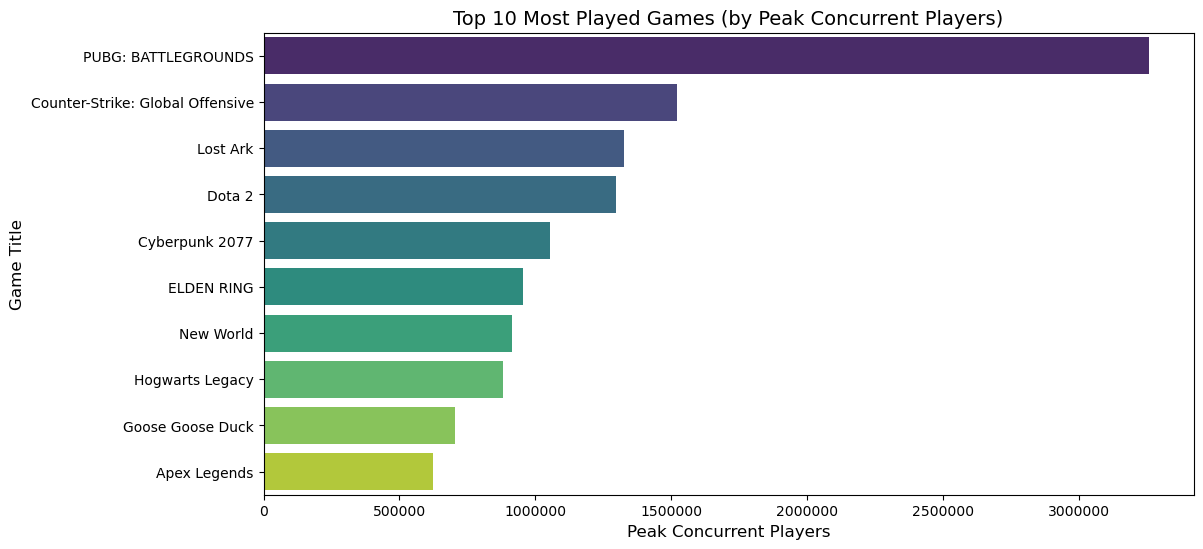

In [32]:
#This visualization shows the top 10 games with the highest peak player counts,
#helping us identify which titles had the largest player activity at one time.
top10 = df.nlargest(10, 'peak_players')

plt.figure(figsize=(12,6))

sns.barplot(
    data=top10,
    x='peak_players',
    y='game',
    hue='game',
    palette='viridis',
    dodge=False,
    legend=False
)

plt.title("Top 10 Most Played Games (by Peak Concurrent Players)", fontsize=14)
plt.xlabel("Peak Concurrent Players", fontsize=12)
plt.ylabel("Game Title", fontsize=12)


plt.ticklabel_format(style='plain', axis='x')

plt.show()



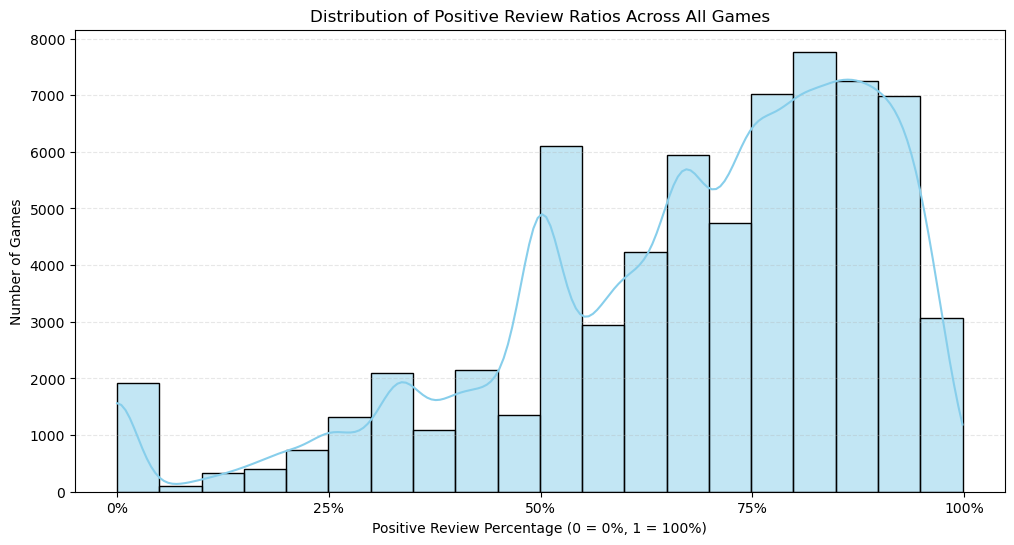

In [33]:
#This visualization shows how positive the reviews are across all games by
#displaying how many games fall into each review percentage range.

plt.figure(figsize=(12,6))
sns.histplot(
    df['pos_ratio'],
    bins=20,
    kde=True,                  
    color='skyblue',
    edgecolor='black'
)

plt.title("Distribution of Positive Review Ratios Across All Games")
plt.xlabel("Positive Review Percentage (0 = 0%, 1 = 100%)")
plt.ylabel("Number of Games")
plt.xticks([0, 0.25, 0.50, 0.75, 1.00], ["0%", "25%", "50%", "75%", "100%"])
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()


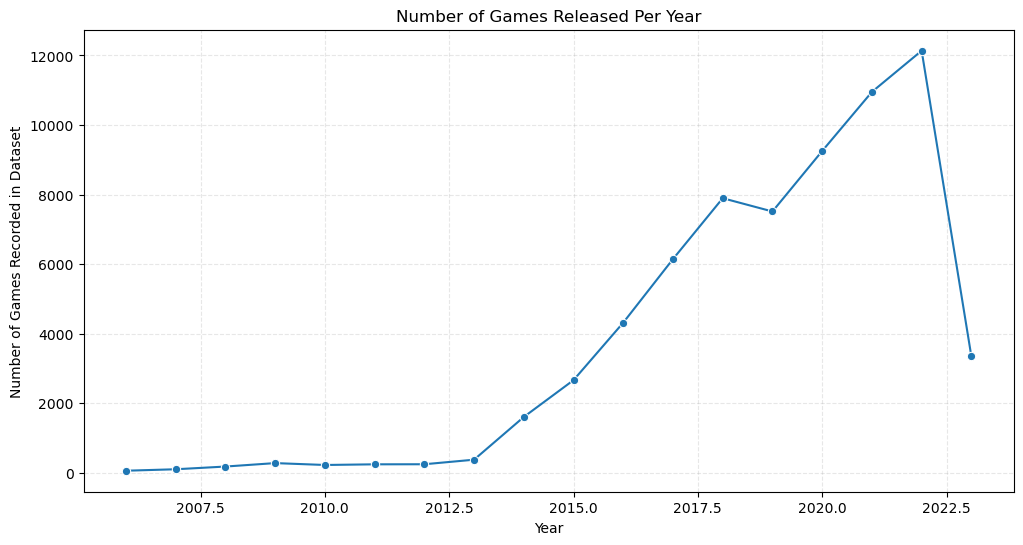

In [34]:
#This visualization shows how many games were released each year in the dataset,
#allowing us to observe long-term growth trends while noting incomplete recent years.

games_per_year = df['year'].value_counts().sort_index()

plt.figure(figsize=(12,6))
sns.lineplot(x=games_per_year.index, y=games_per_year.values, marker="o")

plt.title("Number of Games Released Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Games Recorded in Dataset")

plt.grid(True, linestyle="--", alpha=0.3)
plt.show()


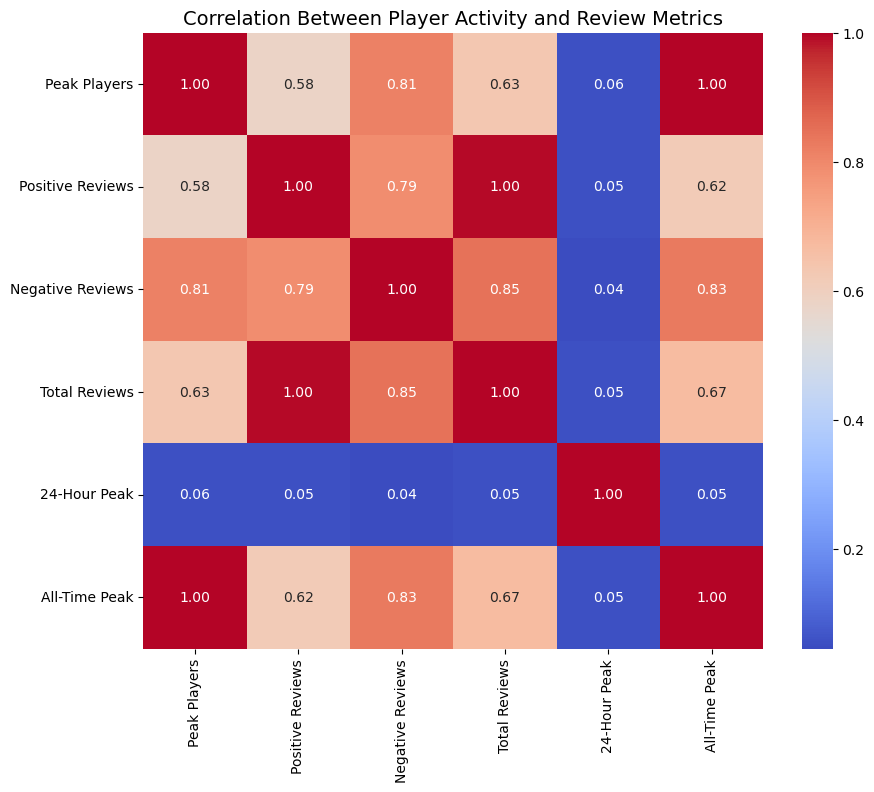

In [35]:
#This visualization displays how strongly different game statistics relate to each other,
#helping us understand which metrics tend to increase together.

plt.figure(figsize=(10,8))

corr_cols = [
    'peak_players',
    'positive_reviews',
    'negative_reviews',
    'total_reviews',
    'peak24',
    'peak_all'
]

corr_matrix = df[corr_cols].corr()

clean_labels = {
    'peak_players': 'Peak Players',
    'positive_reviews': 'Positive Reviews',
    'negative_reviews': 'Negative Reviews',
    'total_reviews': 'Total Reviews',
    'peak24': '24-Hour Peak',
    'peak_all': 'All-Time Peak'
}

corr_matrix = corr_matrix.rename(index=clean_labels, columns=clean_labels)

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)

plt.title("Correlation Between Player Activity and Review Metrics", fontsize=14)
plt.show()


In [63]:
df2.duplicated().sum()

np.int64(0)

In [62]:

df2.isnull().sum()


Unnamed: 0                   0
game                         0
link                         0
release                      0
peak_players                 0
positive_reviews             0
negative_reviews             0
total_reviews                0
rating                       0
primary_genre               10
store_genres                57
publisher                  461
developer                  128
detected_technologies     7306
store_asset_mod_time       296
review_percentage        19804
players_right_now            6
24_hour_peak                 6
all_time_peak                0
all_time_peak_date           6
dtype: int64

In [67]:
df2["primary_genre"].unique().tolist()

['Action (1)',
 'Casual (4)',
 'Indie (23)',
 'RPG (3)',
 'Strategy (2)',
 'Adventure (25)',
 'Free to Play (37)',
 'Simulation (28)',
 'Early Access (70)',
 'Racing (9)',
 'Sports (18)',
 'Massively Multiplayer (29)',
 'Unknown Genre (0)',
 'Violent (73)',
 'Design & Illustration (53)',
 nan,
 'Gore (74)',
 'Sexual Content (71)',
 'Education (54)',
 'Nudity (72)',
 'Game Development (60)',
 'Utilities (57)',
 'Audio Production (52)',
 'Video Production (58)',
 'Web Publishing (59)',
 'Unknown Genre (34)',
 'Unknown Genre (33)',
 'Unknown Genre (6)',
 'Unknown Genre (21)']

In [75]:


# Count occurrences of each unique primary_genre
genre_df = df2["primary_genre"].value_counts().reset_index()

# Rename columns for clarity
genre_df.columns = ["Primary_Genre", "Count"]

genre_df

,Primary_Genre,Count
0,Indie (23),17862
1,Action (1),14723
2,Adventure (25),8247
3,Casual (4),8231
4,Strategy (2),4443
5,Simulation (28),4315
6,RPG (3),4191
7,Free to Play (37),1877
8,Racing (9),1142
9,Sports (18),1012


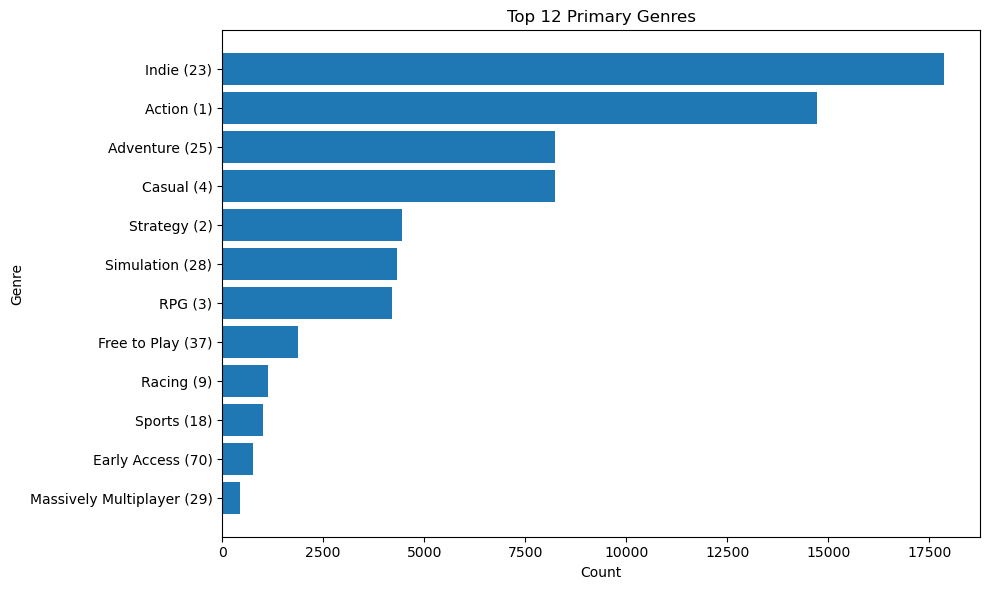

In [76]:
# Select top 12 genres
top12 = genre_df.head(12)

plt.figure(figsize=(10, 6))
plt.barh(top12["Primary_Genre"], top12["Count"])
plt.gca().invert_yaxis()

plt.title("Top 12 Primary Genres")
plt.xlabel("Count")
plt.ylabel("Genre")

plt.tight_layout()
plt.show()

In [77]:
unique_genres = list({
    g.strip()
    for row in df["store_genres"].dropna()
    for g in row.split(",")
})

unique_genres

['Accounting (50)',
 '360 Video (85)',
 'Tutorial (84)',
 'Simulation (28)',
 'Free to Play (37)',
 'Action (1)',
 'RPG (3)',
 'Casual (4)',
 'Education (54)',
 'Documentary (81)',
 'Unknown Genre (22)',
 'Sports (18)',
 'Short (83)',
 'Unknown Genre (33)',
 'Software Training (56)',
 'Movie (80)',
 'Video Production (58)',
 'Audio Production (52)',
 'Design & Illustration (53)',
 'Utilities (57)',
 'Photo Editing (55)',
 'Strategy (2)',
 'Unknown Genre (21)',
 'Unknown Genre (6)',
 'Indie (23)',
 'Violent (73)',
 'Massively Multiplayer (29)',
 'Nudity (72)',
 'Racing (9)',
 'empty string',
 'Web Publishing (59)',
 'Early Access (70)',
 'Animation & Modeling (51)',
 'Unknown Genre (34)',
 'Game Development (60)',
 'Gore (74)',
 'Episodic (82)',
 'Adventure (25)',
 'Sexual Content (71)']

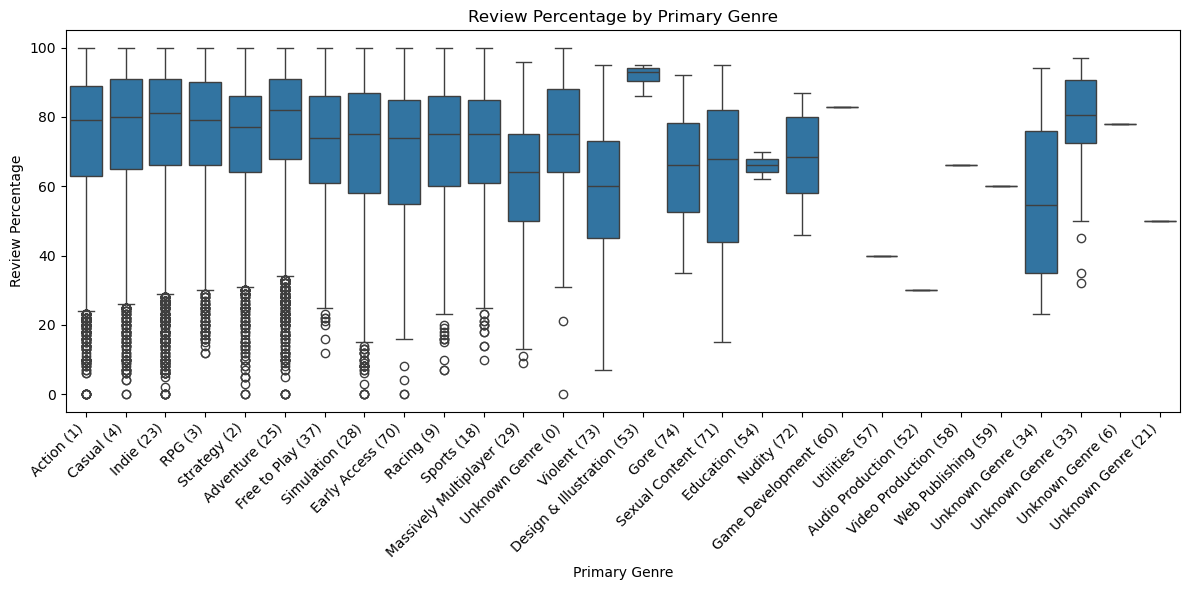

In [78]:
# Assuming df2 is already loaded
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=df2,
    x="primary_genre",
    y="review_percentage"
)

plt.title("Review Percentage by Primary Genre")
plt.xlabel("Primary Genre")
plt.ylabel("Review Percentage")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [86]:
# Group by publisher and sum positive_reviews
publisher_totals = (
    df2.groupby("publisher")["positive_reviews"]
       .sum()
       .reset_index()
       .sort_values(by="positive_reviews", ascending=False)
)

# Select the top 50
top_50_publishers = publisher_totals.head(50)

top_50_publishers

,publisher,positive_reviews
29532,Valve,10176727
8304,Electronic Arts,2219357
29054,Ubisoft,2030486
23489,Rockstar Games,1979349
3249,Bethesda Softworks,1691817
30934,Xbox Game Studios,1589816
23873,SEGA,1407967
4471,CD PROJEKT RED,1330031
191,2K,1300343
22738,Re-Logic,1259549


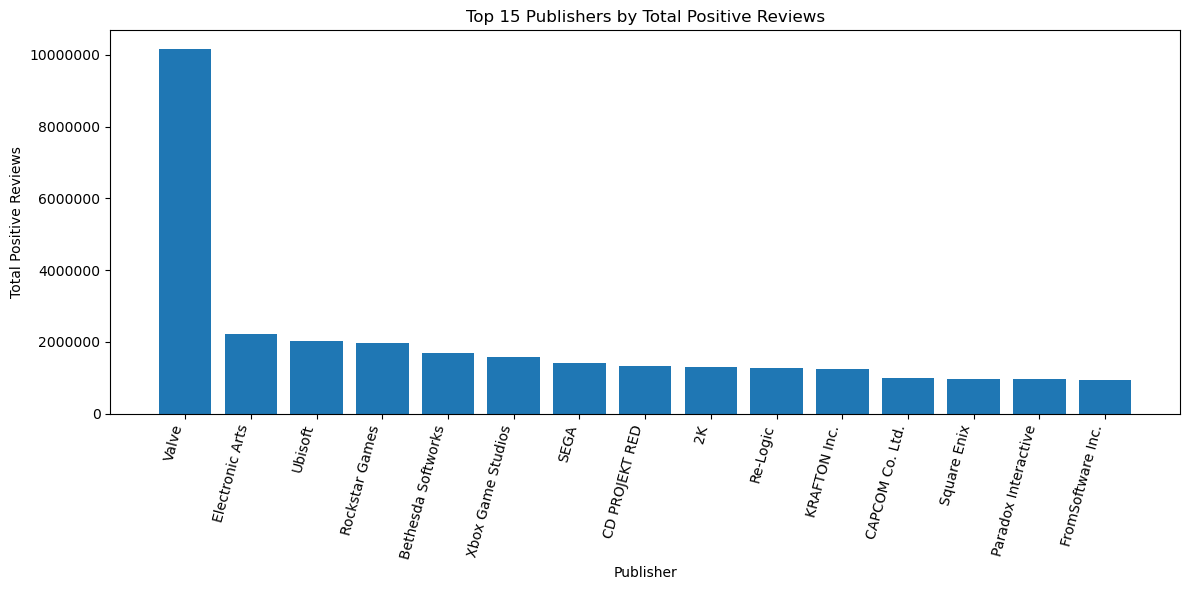

In [88]:
import matplotlib.ticker as ticker

# Select top 15
top_15 = top_50_publishers.head(15)

plt.figure(figsize=(12, 6))

plt.bar(top_15["publisher"], top_15["positive_reviews"])

plt.title("Top 15 Publishers by Total Positive Reviews")
plt.xlabel("Publisher")
plt.ylabel("Total Positive Reviews")

# Disable scientific notation on y-axis
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))

plt.xticks(rotation=75, ha="right")
plt.tight_layout()
plt.show()

In [89]:
# Group by publisher and sum negative_reviews
publisher_negative_totals = (
    df2.groupby("publisher")["negative_reviews"]
       .sum()
       .reset_index()
       .sort_values(by="negative_reviews", ascending=False)
)

# Select the top 15
top_15_negative_publishers = publisher_negative_totals.head(15)

top_15_negative_publishers

,publisher,negative_reviews
29532,Valve,1281407
14542,KRAFTON Inc.,939385
8304,Electronic Arts,574723
29054,Ubisoft,382708
23489,Rockstar Games,314020
191,2K,308971
23873,SEGA,239401
923,Activision,235307
3249,Bethesda Softworks,229967
30934,Xbox Game Studios,215911


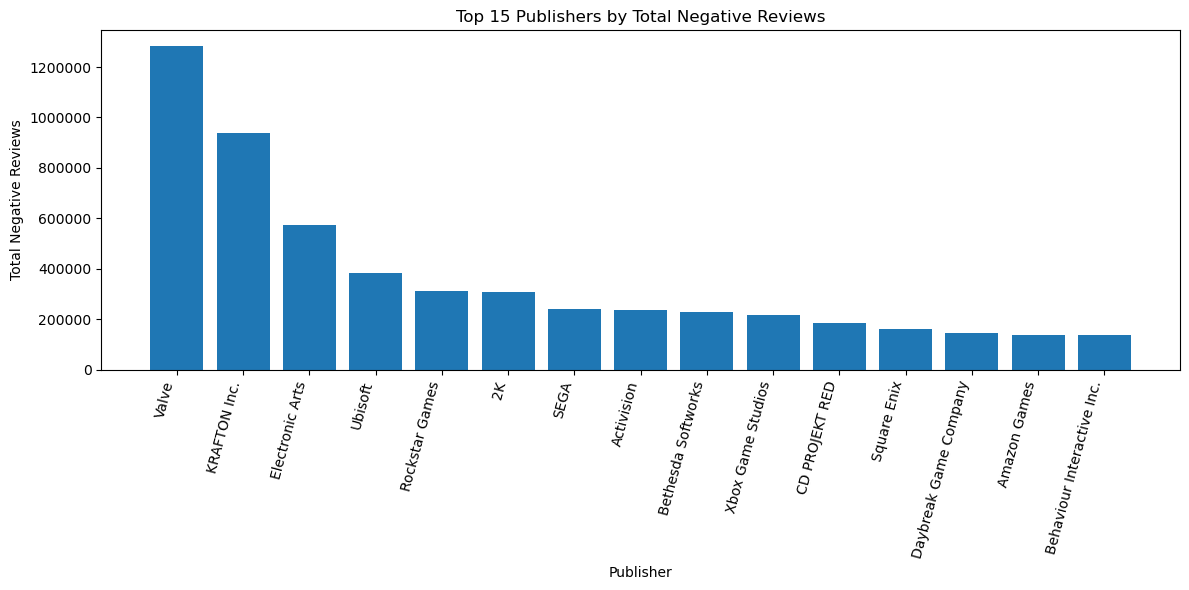

In [90]:
# Select top 15

plt.figure(figsize=(12, 6))

plt.bar(top_15_negative_publishers["publisher"], top_15_negative_publishers["negative_reviews"])

plt.title("Top 15 Publishers by Total Negative Reviews")
plt.xlabel("Publisher")
plt.ylabel("Total Negative Reviews")
# Disable scientific notation on y-axis
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))

plt.xticks(rotation=75, ha="right")
plt.tight_layout()
plt.show()